This notebook will use some basic basic machine learning methods to predict the possibility of getting into a car accident and how severe it would be.

In [1]:
# import library
import pandas as pd
import numpy as np

In [5]:
# read data
path = "https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv"
car_df = pd.read_csv(path)

In [6]:
# check the shape
car_df.shape

(194673, 38)

In [7]:
car_df.head(5)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [8]:
# check data types
df.dtypes
print(df.dtypes)

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [9]:
car_df["ROADCOND"].isnull().sum()

5012

In [10]:
car_df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [11]:
car_df['COLLISIONTYPE'].value_counts()

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

In [12]:
car_df['VEHCOUNT'].value_counts()

2     147650
1      25748
3      13010
0       5085
4       2426
5        529
6        146
7         46
8         15
9          9
11         6
10         2
12         1
Name: VEHCOUNT, dtype: int64

In [13]:
car_df['PEDCYLCOUNT'].value_counts()

0    189189
1      5441
2        43
Name: PEDCYLCOUNT, dtype: int64

In [14]:
car_df['UNDERINFL'].value_counts()

N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64

In [15]:
car_df['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [16]:
car_df['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [17]:
car_df['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [18]:
car_df['PEDROWNOTGRNT'].value_counts()

Y    4667
Name: PEDROWNOTGRNT, dtype: int64

In [19]:
car_df['SPEEDING'].value_counts()

Y    9333
Name: SPEEDING, dtype: int64

In [20]:
car_df['ST_COLCODE'].value_counts()

32    27612
10    23427
14    16883
32    16809
10    11247
      ...  
87        1
85        1
43        1
87        1
54        1
Name: ST_COLCODE, Length: 115, dtype: int64

In [21]:
car_df['SEGLANEKEY'].value_counts()

0         191907
6532          19
6078          16
12162         15
10336         14
           ...  
35157          1
10817          1
15043          1
525169         1
16376          1
Name: SEGLANEKEY, Length: 1955, dtype: int64

In [22]:
car_df['CROSSWALKKEY'].value_counts()

0         190862
523609        17
520838        15
525567        13
521707        10
           ...  
521019         1
630862         1
25545          1
523322         1
27186          1
Name: CROSSWALKKEY, Length: 2198, dtype: int64

In [23]:
car_df['HITPARKEDCAR'].value_counts()

N    187457
Y      7216
Name: HITPARKEDCAR, dtype: int64

In [24]:
car_df['ADDRTYPE'].value_counts()

Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

In [25]:
car_df['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

In [26]:
car_df['INATTENTIONIND'].value_counts()

Y    29805
Name: INATTENTIONIND, dtype: int64

N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64

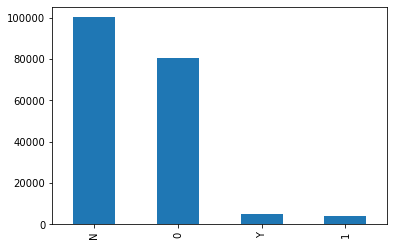

In [29]:
car_df['UNDERINFL'].value_counts().plot(kind='bar')
car_df['UNDERINFL'].value_counts()
O

In [148]:
car_df['HITPARKEDCAR'].value_counts()

N    187457
Y      7216
Name: HITPARKEDCAR, dtype: int64

In [149]:
car_df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [150]:
acc_df=car_df[['ADDRTYPE','ROADCOND','WEATHER','LIGHTCOND','SEVERITYCODE']]
#acc_df.describe()
acc_df

,ADDRTYPE,ROADCOND,WEATHER,LIGHTCOND,SEVERITYCODE
0,Intersection,Wet,Overcast,Daylight,2
1,Block,Wet,Raining,Dark - Street Lights On,1
2,Block,Dry,Overcast,Daylight,1
3,Block,Dry,Clear,Daylight,1
4,Intersection,Wet,Raining,Daylight,2
...,...,...,...,...,...
194668,Block,Dry,Clear,Daylight,2
194669,Block,Wet,Raining,Daylight,1
194670,Intersection,Dry,Clear,Daylight,2
194671,Intersection,Dry,Clear,Dusk,2


In [151]:
acc_df['ADDRTYPE'].value_counts()

Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

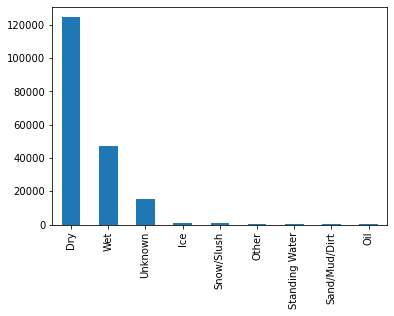

In [152]:
acc_df['ROADCOND'].value_counts()
acc_df['ROADCOND'].value_counts().plot(kind='bar')

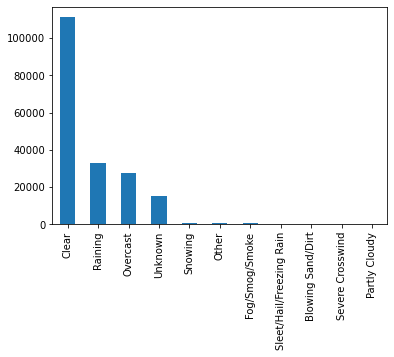

In [153]:
acc_df['WEATHER'].value_counts()
acc_df['WEATHER'].value_counts().plot(kind='bar')

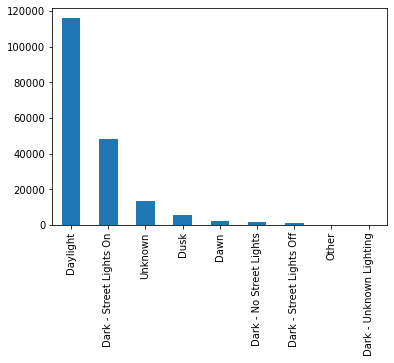

In [154]:
acc_df['LIGHTCOND'].value_counts()
acc_df['LIGHTCOND'].value_counts().plot(kind='bar')

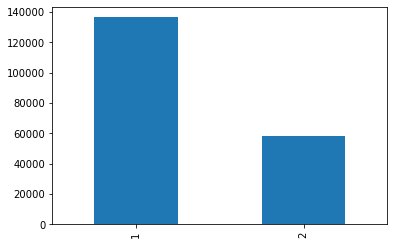

In [155]:
acc_df['SEVERITYCODE'].value_counts()
acc_df['SEVERITYCODE'].value_counts().plot(kind='bar')

In [156]:
# filter out all the unknown rows
acc_df = acc_df[df.ROADCOND != "Unknown"]
acc_df = acc_df[df.WEATHER != "Unknown"]
acc_df = acc_df[df.LIGHTCOND != "Unknown"]
acc_df = acc_df[df.ROADCOND != "Other"]
acc_df = acc_df[df.WEATHER != "Other"]
acc_df = acc_df[df.LIGHTCOND != "Other"]
acc_df

<ipython-input-156-4d28f53d90f7>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acc_df = acc_df[df.WEATHER != "Unknown"]
<ipython-input-156-4d28f53d90f7>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acc_df = acc_df[df.LIGHTCOND != "Unknown"]
<ipython-input-156-4d28f53d90f7>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acc_df = acc_df[df.ROADCOND != "Other"]
<ipython-input-156-4d28f53d90f7>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acc_df = acc_df[df.WEATHER != "Other"]
<ipython-input-156-4d28f53d90f7>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  acc_df = acc_df[df.LIGHTCOND != "Other"]


,ADDRTYPE,ROADCOND,WEATHER,LIGHTCOND,SEVERITYCODE
0,Intersection,Wet,Overcast,Daylight,2
1,Block,Wet,Raining,Dark - Street Lights On,1
2,Block,Dry,Overcast,Daylight,1
3,Block,Dry,Clear,Daylight,1
4,Intersection,Wet,Raining,Daylight,2
...,...,...,...,...,...
194668,Block,Dry,Clear,Daylight,2
194669,Block,Wet,Raining,Daylight,1
194670,Intersection,Dry,Clear,Daylight,2
194671,Intersection,Dry,Clear,Dusk,2


In [157]:
cleanup_nums = {"ADDRTYPE":{"Block": 1, "Intersection": 2, "Alley": 3},
                "ROADCOND":{"Dry": 1,"Wet":0,"Ice":0,"Snow/Slush":0,"Standing Water":0,"Sand/Mud/Dirt":0,"Oil":0},
                "WEATHER": {"Clear": 1, "Raining": 0, "Overcast": 0, "Snowing": 0,"Fog/Smog/Smoke": 0, 
                            "Sleet/Hail/Freezing Rain": 0, "Blowing Sand/Dirt": 0,"Severe Crosswind": 0,"Partly Cloudy": 0 },
                "LIGHTCOND": {"Daylight": 1,"Dark - Street Lights On": 0,"Dusk": 0,"Dawn": 0,"Dark - No Street Light": 0,
                              "Dark - Street Lights Off": 0,"Dark - Unknown Lighting": 0}}
#To convert the columns to numbers using replace :

acc_df.replace(cleanup_nums, inplace=True)
acc_df.head()

,ADDRTYPE,ROADCOND,WEATHER,LIGHTCOND,SEVERITYCODE
0,2.0,0.0,0.0,1,2
1,1.0,0.0,0.0,0,1
2,1.0,1.0,0.0,1,1
3,1.0,1.0,1.0,1,1
4,2.0,0.0,0.0,1,2


In [158]:
# lets rename the colums
acc_df.rename(columns={'ROADCOND':'Dry_Road', 'WEATHER':'Clear_Weather','LIGHTCOND':'Daylight'}, inplace=True)
acc_df.head()

,ADDRTYPE,Dry_Road,Clear_Weather,Daylight,SEVERITYCODE
0,2.0,0.0,0.0,1,2
1,1.0,0.0,0.0,0,1
2,1.0,1.0,0.0,1,1
3,1.0,1.0,1.0,1,1
4,2.0,0.0,0.0,1,2


In [159]:
acc_df["SEVERITYCODE"]=acc_df["SEVERITYCODE"]-1
acc_df.head()

,ADDRTYPE,Dry_Road,Clear_Weather,Daylight,SEVERITYCODE
0,2.0,0.0,0.0,1,1
1,1.0,0.0,0.0,0,0
2,1.0,1.0,0.0,1,0
3,1.0,1.0,1.0,1,0
4,2.0,0.0,0.0,1,1
